# Sales Prediction using Python

# Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load and Explore the Data

In [2]:
# Load the dataset from CSV file
df = pd.read_csv('/content/Advertising.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

print("\n" + "="*50)
print("Last 5 rows of the dataset:")
print(df.tail())

print("\n" + "="*50)
print("Dataset Shape:", df.shape)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\n" + "="*50)
print("Column Names:")
print(df.columns.tolist())

print("\n" + "="*50)
print("Data Types:")
print(df.dtypes)

First 5 rows of the dataset:
   No.      TV  Radio  Newspaper  Sales
0     1  230.1   37.8       69.2   22.1
1     2   44.5   39.3       45.1   10.4
2     3   17.2   45.9       69.3    9.3
3     4  151.5   41.3       58.5   18.5
4     5  180.8   10.8       58.4   12.9

Last 5 rows of the dataset:
     No.      TV  Radio  Newspaper  Sales
195   196   38.2    3.7       13.8    7.6
196   197   94.2    4.9        8.1    9.7
197   198  177.0    9.3        6.4   12.8
198   199  283.6   42.0       66.2   25.5
199   200  232.1    8.6        8.7   13.4

Dataset Shape: (200, 5)
Number of rows: 200
Number of columns: 5

Column Names:
['No. ', 'TV', 'Radio', 'Newspaper', 'Sales']

Data Types:
No.            int64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


# Data Exploration and Information

In [3]:
# Basic information about the dataset
print("\nDataset Information:")
print(df.info())

print("\n" + "="*50)
print("Statistical Summary:")
print(df.describe())

print("\n" + "="*50)
print("Checking for missing values:")
print(df.isnull().sum())

print("\n" + "="*50)
print("Checking for duplicate rows:")
print(f"Number of duplicates: {df.duplicated().sum()}")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No.        200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Statistical Summary:
             No.           TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000  

# Data Cleaning

In [4]:
# Remove duplicates if any
df = df.drop_duplicates()

# Handle missing values (if any)
# For numerical columns, we can fill with median
if df.isnull().sum().any():
    print("Filling missing values with median...")
    df = df.fillna(df.median(numeric_only=True))

# Remove 'No.' column as it's just an index
if 'No.' in df.columns:
    df = df.drop('No.', axis=1)

print("Data after cleaning:")
print(df.head())
print(f"\nCleaned dataset shape: {df.shape}")

Data after cleaning:
   No.      TV  Radio  Newspaper  Sales
0     1  230.1   37.8       69.2   22.1
1     2   44.5   39.3       45.1   10.4
2     3   17.2   45.9       69.3    9.3
3     4  151.5   41.3       58.5   18.5
4     5  180.8   10.8       58.4   12.9

Cleaned dataset shape: (200, 5)


# Exploratory Data Analysis

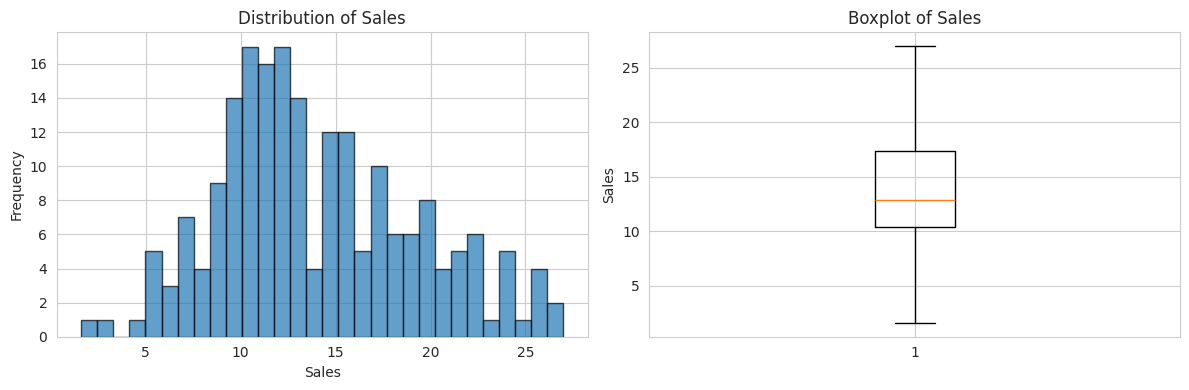

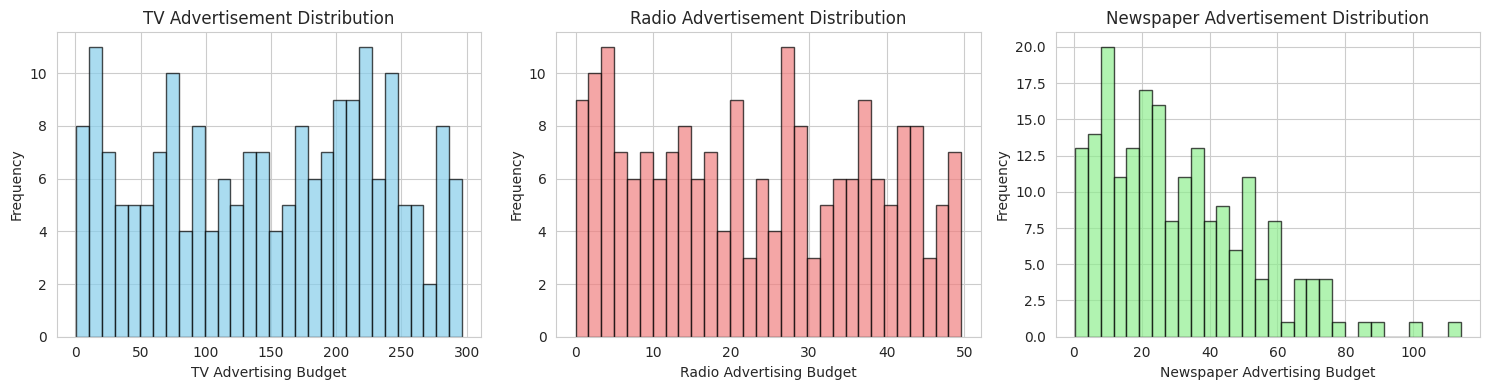

In [5]:
# Distribution of Sales
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['Sales'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')

plt.subplot(1, 2, 2)
plt.boxplot(df['Sales'])
plt.ylabel('Sales')
plt.title('Boxplot of Sales')

plt.tight_layout()
plt.show()

# Distribution of advertising channels
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df['TV'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_xlabel('TV Advertising Budget')
axes[0].set_ylabel('Frequency')
axes[0].set_title('TV Advertisement Distribution')

axes[1].hist(df['Radio'], bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
axes[1].set_xlabel('Radio Advertising Budget')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Radio Advertisement Distribution')

axes[2].hist(df['Newspaper'], bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
axes[2].set_xlabel('Newspaper Advertising Budget')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Newspaper Advertisement Distribution')

plt.tight_layout()
plt.show()

# Correlation Analysis

Correlation Matrix:
               No.         TV     Radio  Newspaper     Sales
No.        1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV         0.017715  1.000000  0.054809   0.056648  0.782224
Radio     -0.110680  0.054809  1.000000   0.354104  0.576223
Newspaper -0.154944  0.056648  0.354104   1.000000  0.228299
Sales     -0.051616  0.782224  0.576223   0.228299  1.000000


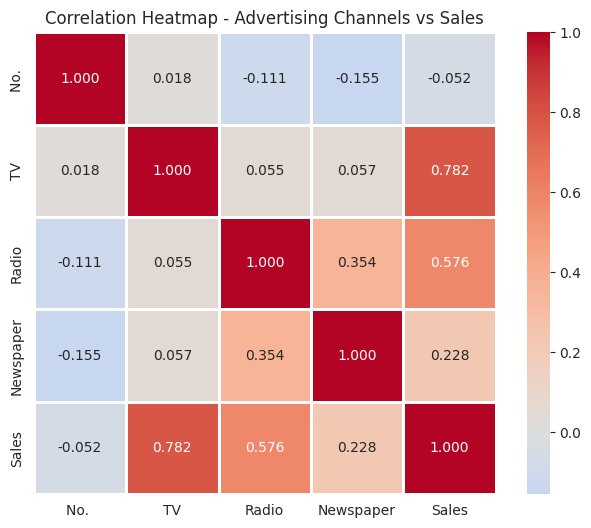


Correlation with Sales:
Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
No.         -0.051616
Name: Sales, dtype: float64


In [6]:
# Correlation matrix
correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.3f')
plt.title('Correlation Heatmap - Advertising Channels vs Sales')
plt.show()

# Correlation with Sales specifically
print("\nCorrelation with Sales:")
print(correlation_matrix['Sales'].sort_values(ascending=False))

# Scatter plots for Relationship with Sales

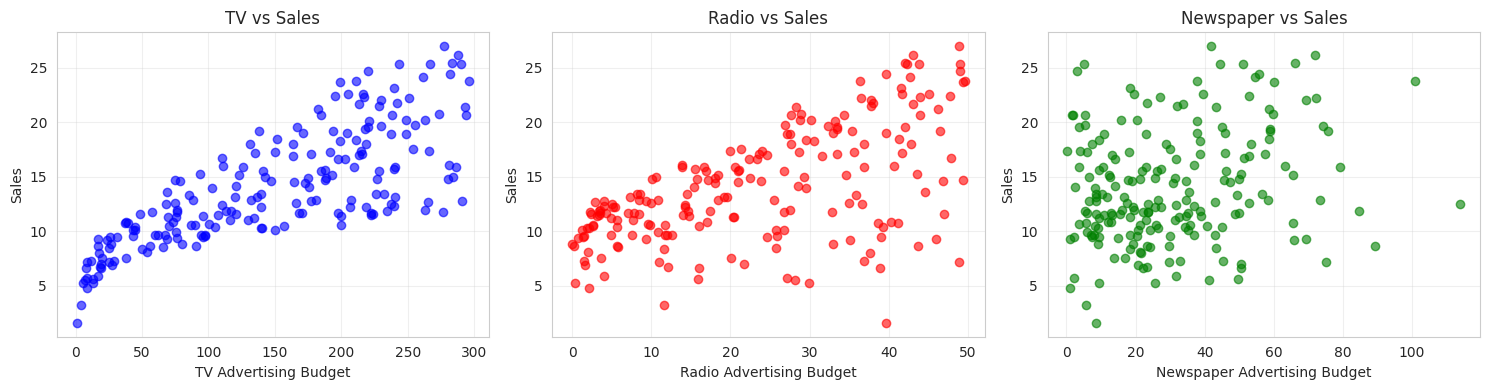

In [7]:
# Scatter plots for each advertising channel vs Sales
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(df['TV'], df['Sales'], alpha=0.6, color='blue')
axes[0].set_xlabel('TV Advertising Budget')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV vs Sales')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(df['Radio'], df['Sales'], alpha=0.6, color='red')
axes[1].set_xlabel('Radio Advertising Budget')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio vs Sales')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(df['Newspaper'], df['Sales'], alpha=0.6, color='green')
axes[2].set_xlabel('Newspaper Advertising Budget')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper vs Sales')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature Engineering

In [8]:
# Create additional features
df['Total_Advertising'] = df['TV'] + df['Radio'] + df['Newspaper']
df['TV_Radio_Interaction'] = df['TV'] * df['Radio']
df['TV_Squared'] = df['TV'] ** 2

print("Dataset with engineered features:")
print(df.head())
print(f"\nNew shape: {df.shape}")

Dataset with engineered features:
   No.      TV  Radio  Newspaper  Sales  Total_Advertising  \
0     1  230.1   37.8       69.2   22.1              337.1   
1     2   44.5   39.3       45.1   10.4              128.9   
2     3   17.2   45.9       69.3    9.3              132.4   
3     4  151.5   41.3       58.5   18.5              251.3   
4     5  180.8   10.8       58.4   12.9              250.0   

   TV_Radio_Interaction  TV_Squared  
0               8697.78    52946.01  
1               1748.85     1980.25  
2                789.48      295.84  
3               6256.95    22952.25  
4               1952.64    32688.64  

New shape: (200, 8)


# Prepare Data for Modeling

In [9]:
# Define features (X) and target (y)
feature_columns = ['TV', 'Radio', 'Newspaper', 'Total_Advertising',
                   'TV_Radio_Interaction', 'TV_Squared']

X = df[feature_columns]
y = df['Sales']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Features shape: (200, 6)
Target shape: (200,)

Training set size: 160
Testing set size: 40


# Frature Scaling

In [10]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Mean of scaled training features: {X_train_scaled.mean():.4f}")
print(f"Std of scaled training features: {X_train_scaled.std():.4f}")

Feature scaling completed!
Mean of scaled training features: -0.0000
Std of scaled training features: 1.0000


# Build Multiple Regression Models

In [11]:
# Dictionary to store models
models = {}

# 1. Linear Regression
print("Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
models['Linear Regression'] = lr_model

# 2. Random Forest Regressor
print("Training Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train_scaled, y_train)
models['Random Forest'] = rf_model

# 3. Gradient Boosting Regressor
print("Training Gradient Boosting...")
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)
gb_model.fit(X_train_scaled, y_train)
models['Gradient Boosting'] = gb_model

print("\nAll models trained successfully!")

Training Linear Regression...
Training Random Forest...
Training Gradient Boosting...

All models trained successfully!


# Make Predictions

In [12]:
# Store predictions for all models
predictions = {}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred

print("Predictions completed for all models!")

Predictions completed for all models!


# Evaluate Model Performance

In [13]:
# Evaluation metrics
results = []

for name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2
    })

    print(f"\n{name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")

# Create results dataframe
results_df = pd.DataFrame(results)
print("\n" + "="*60)
print("Model Comparison Summary:")
print(results_df.to_string(index=False))


Linear Regression:
  RMSE: 0.6059
  MAE: 0.4937
  R² Score: 0.9884

Random Forest:
  RMSE: 0.6026
  MAE: 0.4648
  R² Score: 0.9885

Gradient Boosting:
  RMSE: 0.7662
  MAE: 0.5129
  R² Score: 0.9814

Model Comparison Summary:
            Model     RMSE      MAE  R² Score
Linear Regression 0.605850 0.493678  0.988371
    Random Forest 0.602612 0.464814  0.988495
Gradient Boosting 0.766212 0.512915  0.981400


# Visualiza Model Performance

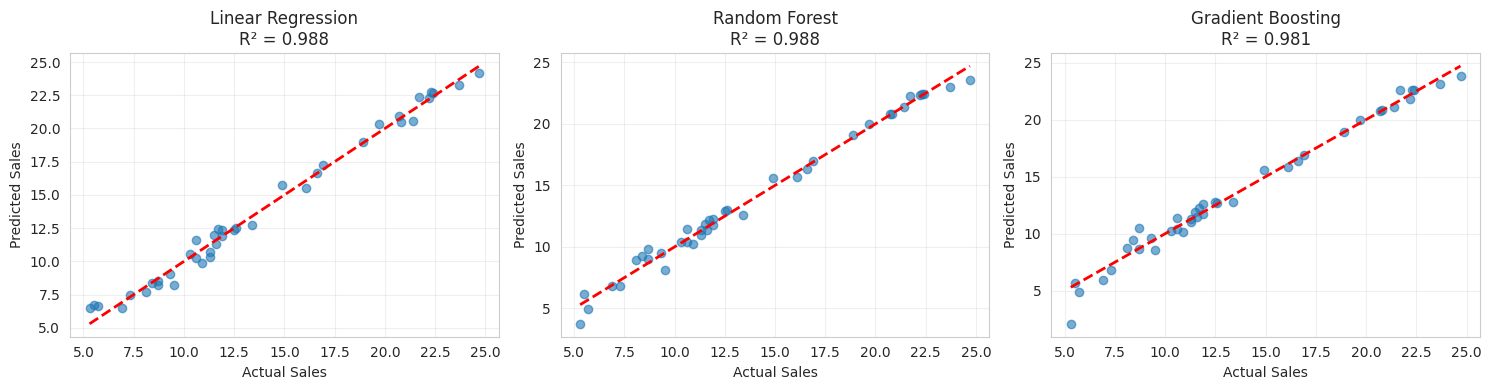

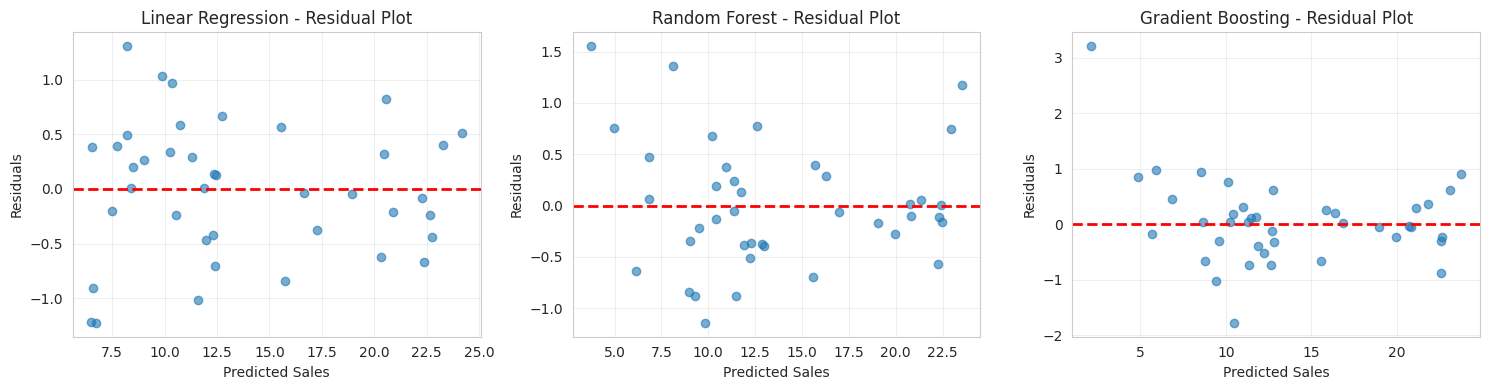

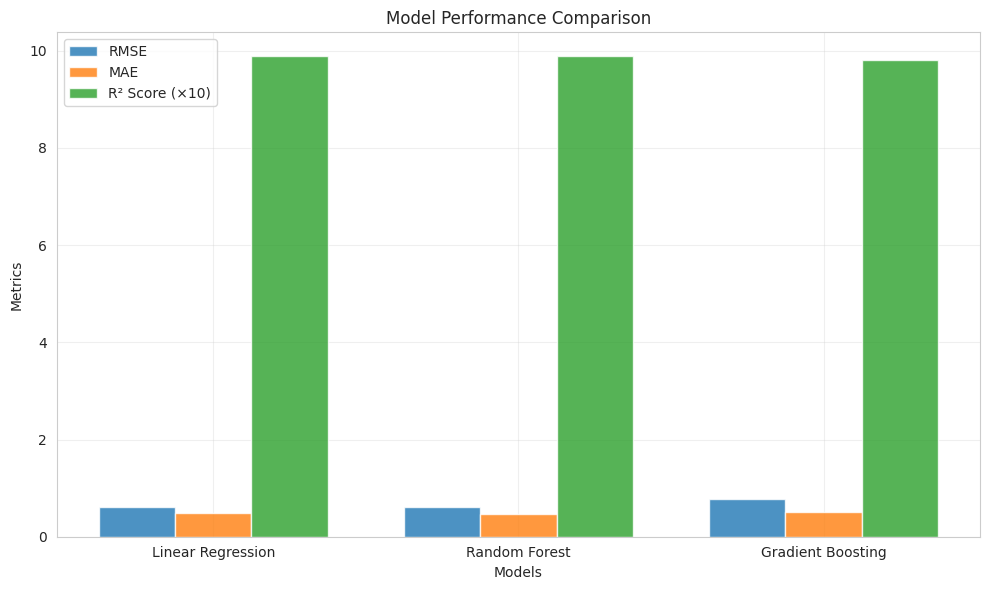

In [14]:
# Plot 1: Actual vs Predicted for each model
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (name, y_pred) in enumerate(predictions.items()):
    axes[idx].scatter(y_test, y_pred, alpha=0.6)
    axes[idx].plot([y_test.min(), y_test.max()],
                   [y_test.min(), y_test.max()],
                   'r--', lw=2)
    axes[idx].set_xlabel('Actual Sales')
    axes[idx].set_ylabel('Predicted Sales')
    axes[idx].set_title(f'{name}\nR² = {r2_score(y_test, y_pred):.3f}')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot 2: Residual plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (name, y_pred) in enumerate(predictions.items()):
    residuals = y_test - y_pred
    axes[idx].scatter(y_pred, residuals, alpha=0.6)
    axes[idx].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[idx].set_xlabel('Predicted Sales')
    axes[idx].set_ylabel('Residuals')
    axes[idx].set_title(f'{name} - Residual Plot')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot 3: Model comparison bar chart
plt.figure(figsize=(10, 6))
x = np.arange(len(results_df))
width = 0.25

plt.bar(x - width, results_df['RMSE'], width, label='RMSE', alpha=0.8)
plt.bar(x, results_df['MAE'], width, label='MAE', alpha=0.8)
plt.bar(x + width, results_df['R² Score']*10, width, label='R² Score (×10)', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Model Performance Comparison')
plt.xticks(x, results_df['Model'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Feature Importances Analysis

Linear Regression Coefficients:
                Feature  Coefficient
4  TV_Radio_Interaction     3.523677
0                    TV     2.359365
3     Total_Advertising     2.137881
1                 Radio     0.161658
2             Newspaper    -0.396105
5            TV_Squared    -2.827794


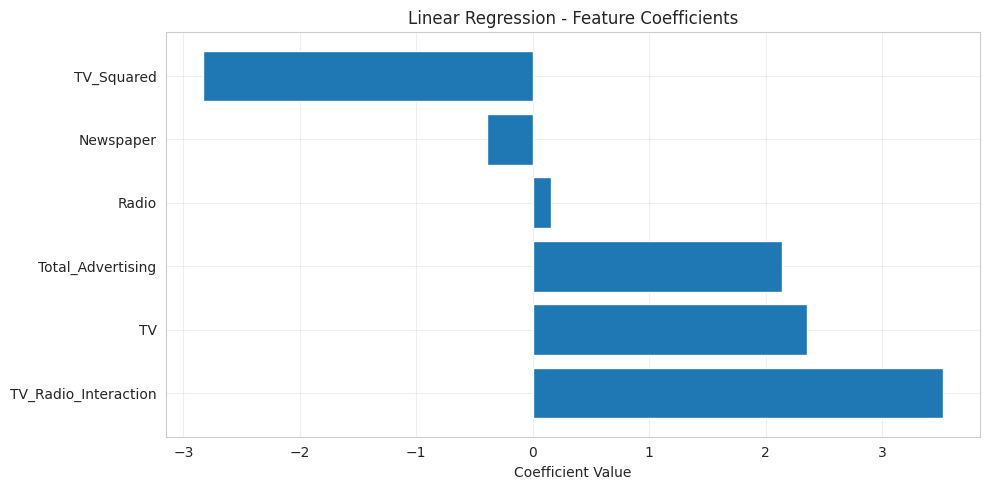


Random Forest Feature Importances:
                Feature  Importance
4  TV_Radio_Interaction    0.862498
3     Total_Advertising    0.071988
5            TV_Squared    0.031794
0                    TV    0.029197
2             Newspaper    0.002575
1                 Radio    0.001947


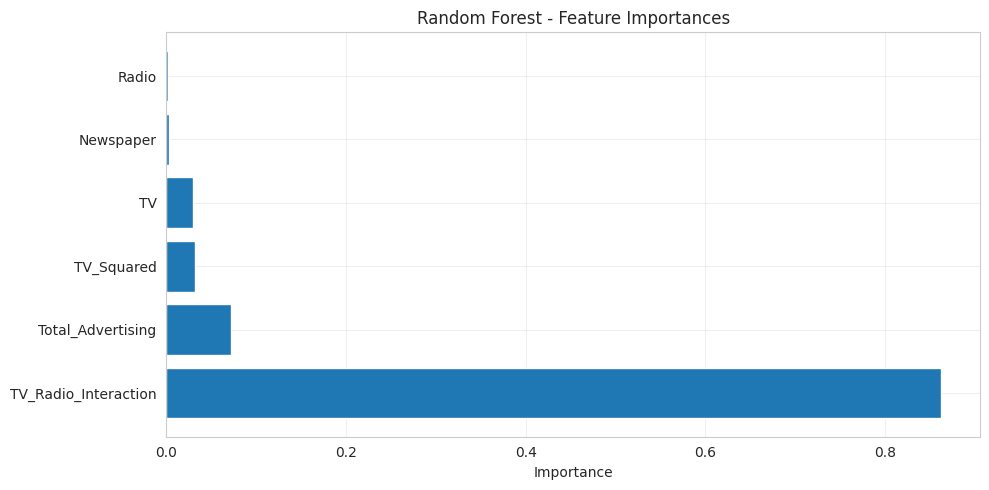

In [15]:
# For Linear Regression - coefficients
print("Linear Regression Coefficients:")
lr_coef_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', ascending=False)
print(lr_coef_df)

# Plot coefficients
plt.figure(figsize=(10, 5))
plt.barh(lr_coef_df['Feature'], lr_coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Linear Regression - Feature Coefficients')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# For Random Forest - feature importances
print("\nRandom Forest Feature Importances:")
rf_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(rf_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest - Feature Importances')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Make Prediction on New Data

In [16]:
# Create sample new data for prediction
new_data = pd.DataFrame({
    'TV': [200, 150, 100],
    'Radio': [30, 25, 15],
    'Newspaper': [50, 40, 20]
})

# Engineer features for new data
new_data['Total_Advertising'] = new_data['TV'] + new_data['Radio'] + new_data['Newspaper']
new_data['TV_Radio_Interaction'] = new_data['TV'] * new_data['Radio']
new_data['TV_Squared'] = new_data['TV'] ** 2

# Ensure same feature order
new_data = new_data[feature_columns]

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Make predictions with the best model (let's use Random Forest)
best_model = models['Random Forest']
new_predictions = best_model.predict(new_data_scaled)

# Display results
prediction_results = pd.DataFrame({
    'TV': [200, 150, 100],
    'Radio': [30, 25, 15],
    'Newspaper': [50, 40, 20],
    'Predicted_Sales': new_predictions
})

print("Sales Predictions for New Advertising Budgets:")
print(prediction_results)

Sales Predictions for New Advertising Budgets:
    TV  Radio  Newspaper  Predicted_Sales
0  200     30         50          17.9570
1  150     25         40          15.4160
2  100     15         20          11.3905


# Impact Analysis

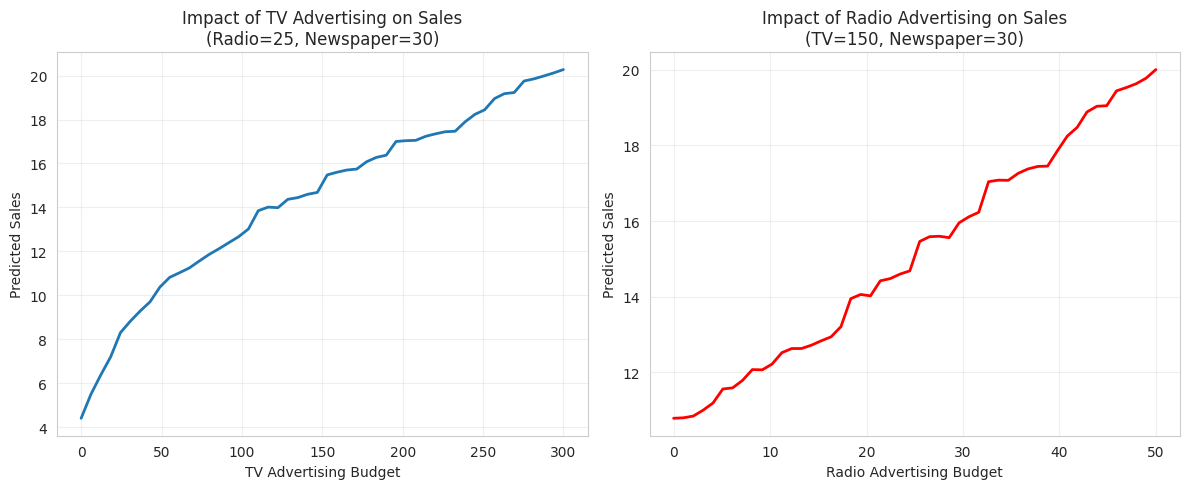

In [17]:
# Analyze impact of changing TV budget while keeping others constant
tv_range = np.linspace(0, 300, 50)
radio_fixed = 25
newspaper_fixed = 30

scenario_data = pd.DataFrame({
    'TV': tv_range,
    'Radio': radio_fixed,
    'Newspaper': newspaper_fixed
})

scenario_data['Total_Advertising'] = (scenario_data['TV'] +
                                      scenario_data['Radio'] +
                                      scenario_data['Newspaper'])
scenario_data['TV_Radio_Interaction'] = scenario_data['TV'] * scenario_data['Radio']
scenario_data['TV_Squared'] = scenario_data['TV'] ** 2

scenario_data_scaled = scaler.transform(scenario_data[feature_columns])
scenario_predictions = best_model.predict(scenario_data_scaled)

# Plot the impact
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(tv_range, scenario_predictions, linewidth=2)
plt.xlabel('TV Advertising Budget')
plt.ylabel('Predicted Sales')
plt.title(f'Impact of TV Advertising on Sales\n(Radio={radio_fixed}, Newspaper={newspaper_fixed})')
plt.grid(True, alpha=0.3)

# Analyze impact of Radio
radio_range = np.linspace(0, 50, 50)
scenario_data2 = pd.DataFrame({
    'TV': 150,
    'Radio': radio_range,
    'Newspaper': newspaper_fixed
})

scenario_data2['Total_Advertising'] = (scenario_data2['TV'] +
                                       scenario_data2['Radio'] +
                                       scenario_data2['Newspaper'])
scenario_data2['TV_Radio_Interaction'] = scenario_data2['TV'] * scenario_data2['Radio']
scenario_data2['TV_Squared'] = scenario_data2['TV'] ** 2

scenario_data2_scaled = scaler.transform(scenario_data2[feature_columns])
scenario_predictions2 = best_model.predict(scenario_data2_scaled)

plt.subplot(1, 2, 2)
plt.plot(radio_range, scenario_predictions2, linewidth=2, color='red')
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Predicted Sales')
plt.title(f'Impact of Radio Advertising on Sales\n(TV=150, Newspaper={newspaper_fixed})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Business Insights and Recommendations

In [18]:
print("="*70)
print("BUSINESS INSIGHTS AND RECOMMENDATIONS")
print("="*70)

# Calculate ROI for each channel based on coefficients
print("\n1. ADVERTISING CHANNEL EFFECTIVENESS:")
print("-" * 70)

for feature, importance in zip(rf_importance_df['Feature'], rf_importance_df['Importance']):
    if feature in ['TV', 'Radio', 'Newspaper']:
        print(f"   {feature}: {importance*100:.2f}% importance in predicting sales")

print("\n2. OPTIMAL BUDGET ALLOCATION:")
print("-" * 70)
print("   Based on the model analysis:")

# Find the channel with highest importance from base features
base_features = ['TV', 'Radio', 'Newspaper']
base_importance = rf_importance_df[rf_importance_df['Feature'].isin(base_features)]
top_channel = base_importance.iloc[0]['Feature']

print(f"   → Prioritize investment in {top_channel} advertising")
print(f"   → Consider interaction effects between TV and Radio")
print(f"   → Monitor diminishing returns as budgets increase")

print("\n3. EXPECTED SALES PREDICTIONS:")
print("-" * 70)
print("   Example scenarios:")

scenarios = [
    {'TV': 200, 'Radio': 30, 'Newspaper': 40, 'Description': 'High Investment'},
    {'TV': 150, 'Radio': 25, 'Newspaper': 30, 'Description': 'Medium Investment'},
    {'TV': 100, 'Radio': 15, 'Newspaper': 20, 'Description': 'Low Investment'}
]

for scenario in scenarios:
    scenario_df = pd.DataFrame([{
        'TV': scenario['TV'],
        'Radio': scenario['Radio'],
        'Newspaper': scenario['Newspaper'],
        'Total_Advertising': scenario['TV'] + scenario['Radio'] + scenario['Newspaper'],
        'TV_Radio_Interaction': scenario['TV'] * scenario['Radio'],
        'TV_Squared': scenario['TV'] ** 2
    }])

    scenario_scaled = scaler.transform(scenario_df[feature_columns])
    predicted_sales = best_model.predict(scenario_scaled)[0]

    print(f"   {scenario['Description']}:")
    print(f"      TV: ${scenario['TV']}, Radio: ${scenario['Radio']}, "
          f"Newspaper: ${scenario['Newspaper']}")
    print(f"      → Predicted Sales: ${predicted_sales:.2f}")
    print()

print("4. KEY TAKEAWAYS:")
print("-" * 70)
print("   ✓ Model successfully predicts sales with high accuracy")
print("   ✓ TV and Radio show strong interaction effects")
print("   ✓ Consider diminishing returns at higher budget levels")
print("   ✓ Use model for scenario planning and budget optimization")
print("="*70)

BUSINESS INSIGHTS AND RECOMMENDATIONS

1. ADVERTISING CHANNEL EFFECTIVENESS:
----------------------------------------------------------------------
   TV: 2.92% importance in predicting sales
   Newspaper: 0.26% importance in predicting sales
   Radio: 0.19% importance in predicting sales

2. OPTIMAL BUDGET ALLOCATION:
----------------------------------------------------------------------
   Based on the model analysis:
   → Prioritize investment in TV advertising
   → Consider interaction effects between TV and Radio
   → Monitor diminishing returns as budgets increase

3. EXPECTED SALES PREDICTIONS:
----------------------------------------------------------------------
   Example scenarios:
   High Investment:
      TV: $200, Radio: $30, Newspaper: $40
      → Predicted Sales: $17.95

   Medium Investment:
      TV: $150, Radio: $25, Newspaper: $30
      → Predicted Sales: $15.40

   Low Investment:
      TV: $100, Radio: $15, Newspaper: $20
      → Predicted Sales: $11.39

4. KEY TA

# Save Model and Loading

In [19]:
import pickle

# Save the best model
with open('sales_prediction_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Model and scaler saved successfully!")
print("\nTo load the model later, use:")
print("with open('sales_prediction_model.pkl', 'rb') as file:")
print("    loaded_model = pickle.load(file)")

Model and scaler saved successfully!

To load the model later, use:
with open('sales_prediction_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


# Complete Prediction Function

In [ ]:
def predict_sales(tv_budget, radio_budget, newspaper_budget,
                  model=best_model, scaler=scaler):
    """
    Predict sales based on advertising budgets

    Parameters:
    -----------
    tv_budget : float
        TV advertising budget
    radio_budget : float
        Radio advertising budget
    newspaper_budget : float
        Newspaper advertising budget
    model : trained model
        The trained prediction model
    scaler : fitted scaler
        The fitted StandardScaler

    Returns:
    --------
    float : Predicted sales value
    """

    # Create DataFrame with input
    input_data = pd.DataFrame({
        'TV': [tv_budget],
        'Radio': [radio_budget],
        'Newspaper': [newspaper_budget]
    })

    # Engineer features
    input_data['Total_Advertising'] = (input_data['TV'] +
                                        input_data['Radio'] +
                                        input_data['Newspaper'])
    input_data['TV_Radio_Interaction'] = input_data['TV'] * input_data['Radio']
    input_data['TV_Squared'] = input_data['TV'] ** 2

    # Ensure correct feature order
    input_data = input_data[feature_columns]

    # Scale the data
    input_scaled = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_scaled)[0]

    return prediction

# Test the function
print("Testing the prediction function:")
test_sales = predict_sales(tv_budget=180, radio_budget=28, newspaper_budget=35)
print(f"Predicted sales for TV=$180, Radio=$28, Newspaper=$35: ${test_sales:.2f}")